# Assignment #4: LSTM and Seq2Seq Models

## Q10: LSTM for Time Series Prediction

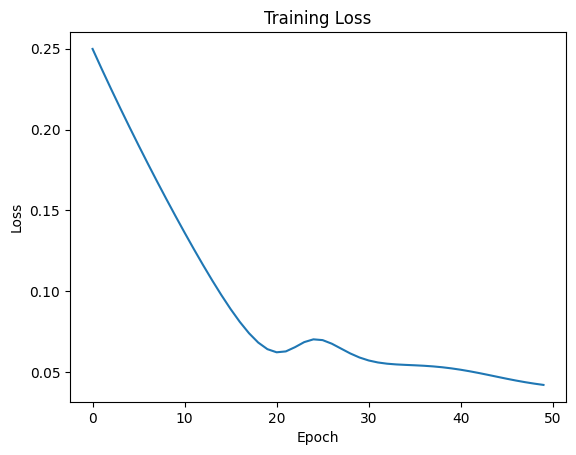

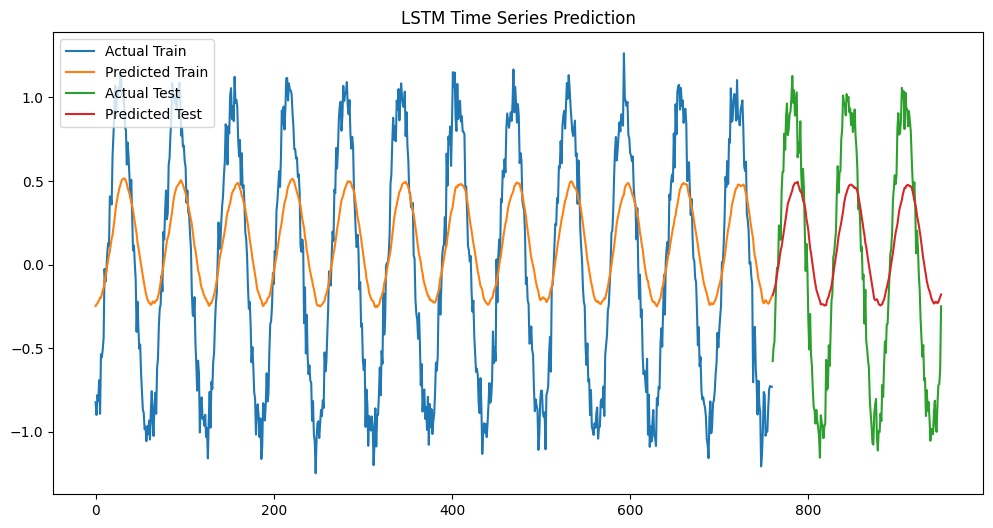

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Generate time series data (sine wave)
t = np.linspace(0, 100, 1000)
data = np.sin(t) + 0.1 * np.random.randn(1000)

# Normalize data
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50
X, y = create_sequences(data, seq_length)
X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)

# Split data
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 50
train_losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

# Plot training loss
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Predictions
model.eval()
with torch.no_grad():
    train_pred = model(X_train)
    test_pred = model(X_test)

# Inverse transform
train_pred = scaler.inverse_transform(train_pred.numpy())
test_pred = scaler.inverse_transform(test_pred.numpy())
y_train_actual = scaler.inverse_transform(y_train.numpy())
y_test_actual = scaler.inverse_transform(y_test.numpy())

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train_actual)), y_train_actual, label='Actual Train')
plt.plot(range(len(y_train_actual)), train_pred, label='Predicted Train')
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), y_test_actual, label='Actual Test')
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), test_pred, label='Predicted Test')
plt.legend()
plt.title('LSTM Time Series Prediction')
plt.show()

## Q11: Sequence-to-Sequence Learning using LSTM

TensorFlow version: 2.19.0
Sample input: [4 5 6 7 8], target: [5 6 7 8 9]


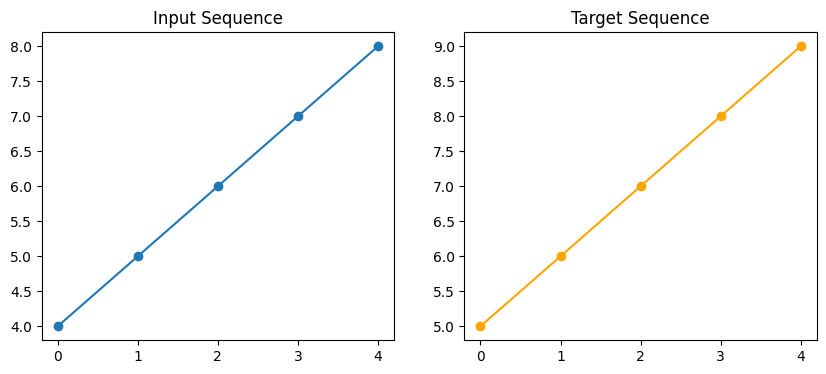

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 5, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 5, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 128),     │     66,560 │ input_layer[0][0] │
│                     │ (None, 128),      │            │                   │
│                     │ (None, 128)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 5, 128),  │     66,560 │ input_layer_1[0]… │
│                     │ (None, 128),      │            │ lstm[0][1],       │
│                     │ (None, 128)]      │            │ lstm[0][2]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 5, 1)      │        129 │ lstm_1[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 133,249 (520.50 KB)

 Trainable params: 133,249 (520.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 45.9714 - mae: 5.9329 - val_loss: 5.9075 - val_mae: 2.1255
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5281 - mae: 2.0312 - val_loss: 3.6450 - val_mae: 1.6561
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0295 - mae: 1.4063 - val_loss: 0.8423 - val_mae: 0.7001
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5961 - mae: 0.5988 - val_loss: 0.3427 - val_mae: 0.4603
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2354 - mae: 0.3694 - val_loss: 0.1327 - val_mae: 0.2760
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1000 - mae: 0.2248 - val_loss: 0.0627 - val_mae: 0.1747
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0487 - mae: 0.1579 - val_loss: 0.0477 - val_mae: 0.1606
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0397 - mae: 0.1465 - val_loss: 0.0413 - val_mae: 0.1543
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0330 - mae

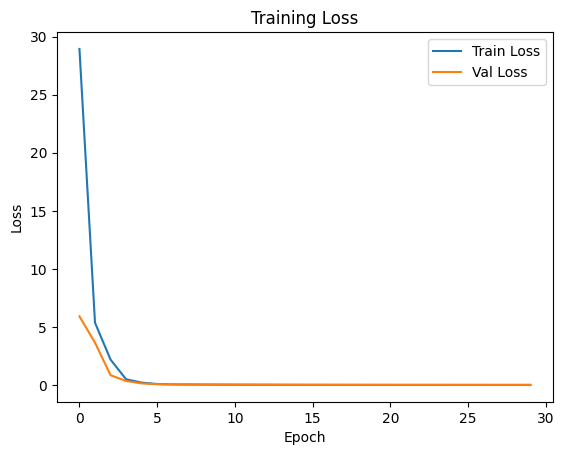

Test Loss: 0.0039, MAE: 0.0389
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


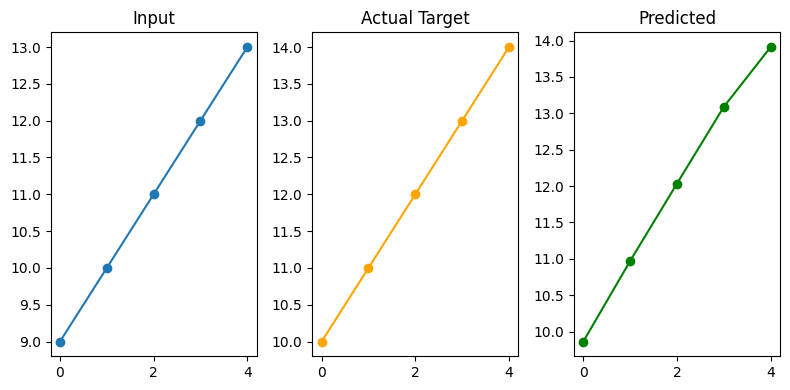

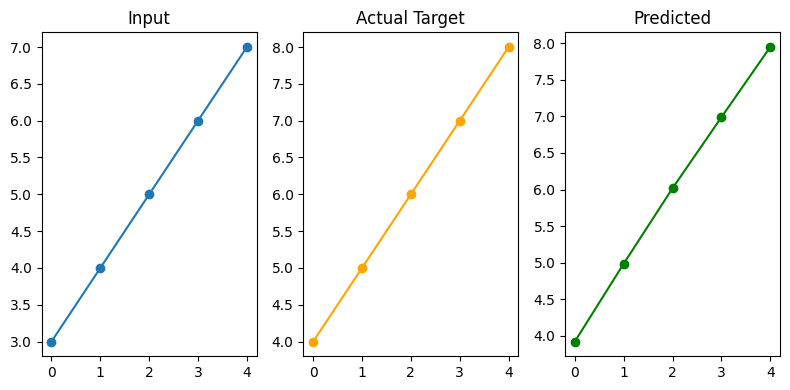

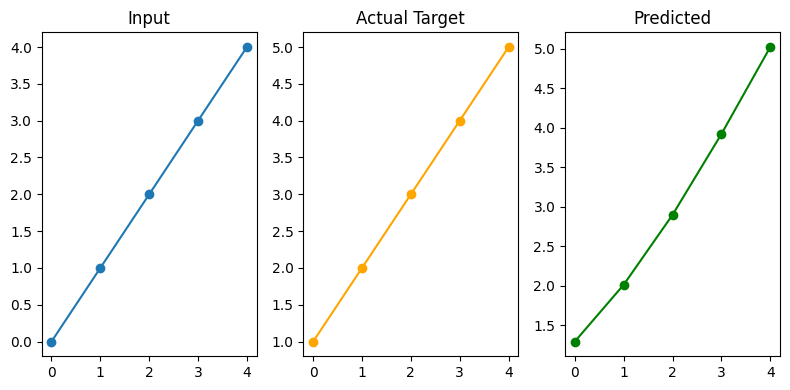

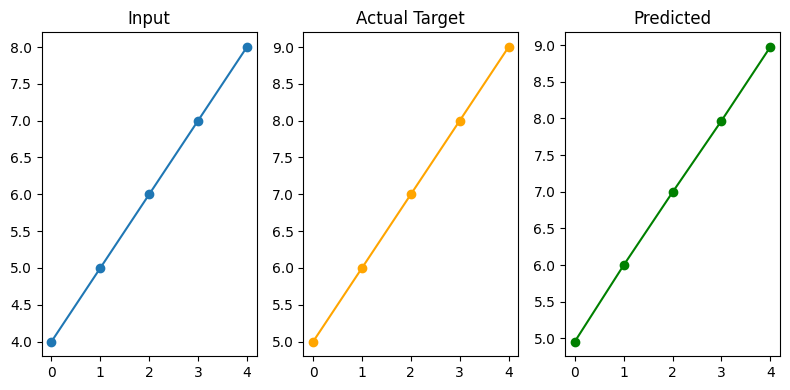

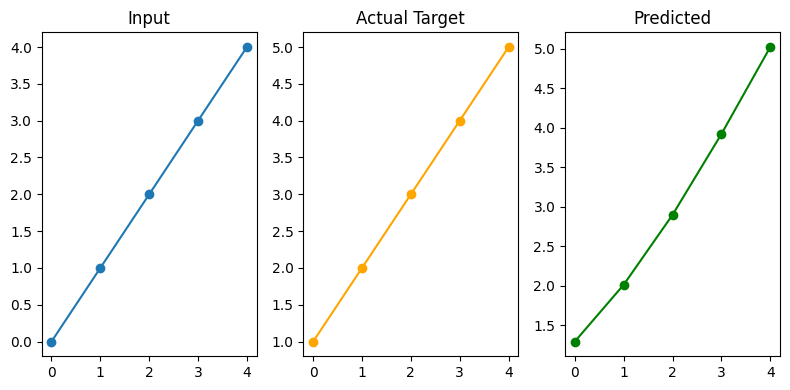

The Encoder-Decoder LSTM learned to shift the input sequence by +1, demonstrating sequence transformation capability.


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

# Generate sequence data
def generate_sequences(num_samples=1000, seq_length=5):
    X, y = [], []
    for _ in range(num_samples):
        start = np.random.randint(0, 10)
        seq = np.arange(start, start + seq_length)
        target = seq + 1
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

X, y = generate_sequences()
print(f"Sample input: {X[0]}, target: {y[0]}")

# Visualize
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(X[0], 'o-', label='Input')
plt.title('Input Sequence')
plt.subplot(1, 2, 2)
plt.plot(y[0], 'o-', label='Target', color='orange')
plt.title('Target Sequence')
plt.show()

# Reshape for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Encoder-Decoder Model
def build_seq2seq_model(seq_length, latent_dim=128):
    # Encoder
    encoder_inputs = keras.Input(shape=(seq_length, 1))
    encoder = keras.layers.LSTM(latent_dim, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]

    # Decoder
    decoder_inputs = keras.Input(shape=(seq_length, 1))
    decoder_lstm = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = keras.layers.Dense(1, activation='linear')
    decoder_outputs = decoder_dense(decoder_outputs)

    model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
    return model

model = build_seq2seq_model(seq_length=5)
model.summary()

# Compile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Prepare decoder inputs (same as targets for teacher forcing)
decoder_input_train = y_train
decoder_input_test = y_test

# Train
history = model.fit([X_train, decoder_input_train], y_train,
                    epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate
loss, mae = model.evaluate([X_test, decoder_input_test], y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, MAE: {mae:.4f}")

# Predictions
predictions = model.predict([X_test[:5], decoder_input_test[:5]])

# Visualize predictions
for i in range(5):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 3, 1)
    plt.plot(X_test[i].flatten(), 'o-', label='Input')
    plt.title('Input')
    plt.subplot(1, 3, 2)
    plt.plot(y_test[i].flatten(), 'o-', label='Actual', color='orange')
    plt.title('Actual Target')
    plt.subplot(1, 3, 3)
    plt.plot(predictions[i].flatten(), 'o-', label='Predicted', color='green')
    plt.title('Predicted')
    plt.tight_layout()
    plt.show()

print("The Encoder-Decoder LSTM learned to shift the input sequence by +1, demonstrating sequence transformation capability.")